# 목표 - 데이터 전처리
- 데이터 불러오기
## 데이터 탐색
    - boxplot
    - 정규성
    - t검정 평균이 차이나는지
    - F검정 분산이 차이나는지
    - VIF와 공분산성 확인 ∵다중공선성 문제
## 데이터 전처리
- minmaxscale
- standardscale
- robustscale
- log변환
## 데이터 재탐색
    - 공분산 hitmap
    - VIF 확인
    - 정규성 검증
    - t검정

# for 데이터 전처리

In [110]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\Users\jay_hook\myhub\miniproj


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

- 데이터 불러오기

In [112]:
df = pd.read_csv(current_directory+'/monthly_data.csv', index_col=0)

## EDA 데이터 탐색 

In [113]:
df

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,원자재구입가격실적,"M2(말잔, 원계열)",미국M2,USBIR,KOBIR,KOTN,USTN,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율,한국실업률,미국실업률
0,200501,1006.0,95.3,106.39,125,951377.5,6404.1,2.250,3.25,4.420,4.128,18478.7,15159.4,82.3,77.9,3.8,5.3
1,200502,1015.5,108.1,110.62,121,970720.0,6405.7,2.500,3.25,4.880,4.377,16918.5,14327.2,82.9,77.9,3.7,5.4
2,200503,997.1,110.9,103.98,124,970629.1,6464.9,2.750,3.25,4.770,4.481,19646.9,17966.4,82.0,78.9,3.7,5.2
3,200504,1007.7,110.4,100.87,126,987882.7,6508.3,2.750,3.25,4.690,4.198,18863.2,16692.5,82.5,78.6,3.7,5.2
4,200505,1025.4,103.8,101.94,116,987197.7,6459.8,3.000,3.25,4.420,3.981,19091.2,16888.4,82.6,79.8,3.7,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,202208,1430.2,99.3,97.92,132,3737384.8,21552.7,2.375,2.50,3.322,3.193,48689.5,55181.8,86.0,83.6,2.6,3.7
212,202209,1424.3,98.0,86.14,127,3747840.6,21475.3,3.125,2.50,3.897,3.829,48955.1,51457.7,85.6,84.3,2.8,3.5
213,202210,1318.8,95.4,80.15,120,3769959.8,21388.4,3.125,3.00,4.267,4.048,44748.6,49349.4,85.4,83.4,2.8,3.7
214,202211,1264.5,91.2,88.53,121,3798048.0,21400.7,3.875,3.25,3.915,3.605,43660.8,48129.0,84.3,81.8,2.8,3.6


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 215
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           216 non-null    int64  
 1   KRW/USD      216 non-null    float64
 2   경제심리지수(원계열)  216 non-null    float64
 3   뉴스심리지수       216 non-null    float64
 4   원자재구입가격실적    216 non-null    int64  
 5   M2(말잔, 원계열)  216 non-null    float64
 6   미국M2         216 non-null    float64
 7   USBIR        216 non-null    float64
 8   KOBIR        216 non-null    float64
 9   KOTN         216 non-null    float64
 10  USTN         216 non-null    float64
 11  달러결제수출금액     216 non-null    float64
 12  달러결제수입금액     216 non-null    float64
 13  달러결제수출비율     216 non-null    float64
 14  달러결제수입비율     216 non-null    float64
 15  한국실업률        216 non-null    float64
 16  미국실업률        216 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 30.4 KB


In [115]:
df.describe()

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,원자재구입가격실적,"M2(말잔, 원계열)",미국M2,USBIR,KOBIR,KOTN,USTN,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율,한국실업률,미국실업률
count,216.0000,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,201356.5000,1118.463889,100.156944,100.000000,114.699074,2.103537e+06,11895.395833,1.321181,2.396991,3.474602,2.741454,35463.172685,31498.181019,84.513426,81.099537,3.517130,6.039352
std,520.0294,105.203270,10.402766,10.000217,13.666023,7.779532e+05,4404.768241,1.664064,1.255028,1.406553,1.103073,8183.327197,8091.549435,1.337111,2.141473,0.360017,2.141001
min,200501.0000,900.700000,61.200000,60.040000,90.000000,9.513775e+05,6404.100000,0.125000,0.500000,1.254000,0.528000,16918.500000,14327.200000,80.900000,76.300000,2.600000,3.500000
25%,200906.7500,1066.275000,95.400000,94.992500,104.000000,1.509021e+06,8428.050000,0.125000,1.500000,2.203500,1.914750,29441.425000,26199.100000,83.575000,79.500000,3.300000,4.400000
50%,201356.5000,1120.800000,100.050000,100.935000,112.000000,1.937474e+06,11102.950000,0.250000,2.000000,3.305000,2.567000,37571.250000,31745.700000,84.550000,81.000000,3.500000,5.150000
75%,201806.2500,1178.100000,106.850000,106.182500,122.000000,2.632953e+06,14083.425000,2.125000,3.250000,4.910000,3.515750,40816.575000,36272.400000,85.600000,82.625000,3.700000,7.725000
max,202212.0000,1534.000000,117.100000,119.420000,160.000000,3.798048e+06,21855.700000,5.250000,5.250000,6.030000,5.136000,54293.600000,55347.900000,87.000000,87.000000,4.800000,14.700000


In [116]:
Mdate = df['시점']
y = df['KRW/USD']
X = df.drop(['시점', 'KRW/USD'], axis=1)

- boxplot

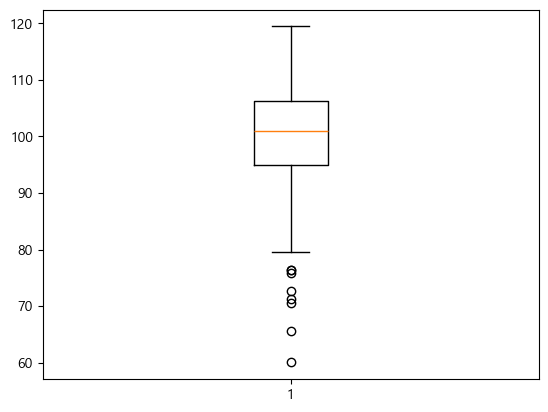

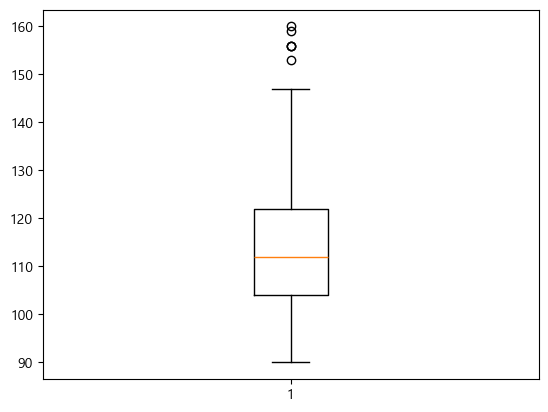

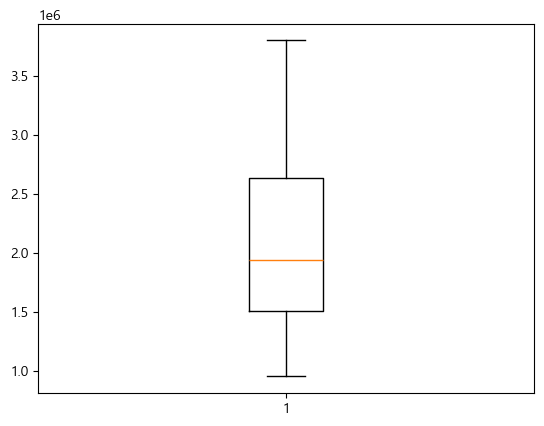

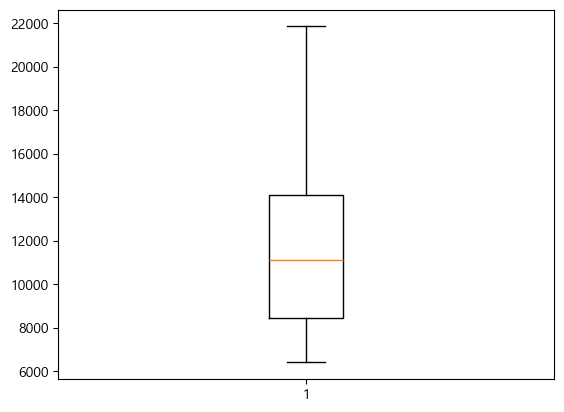

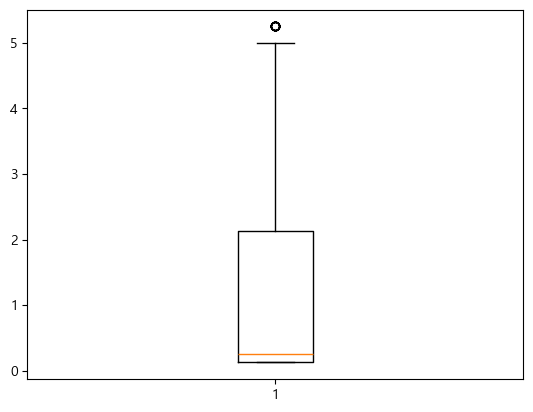

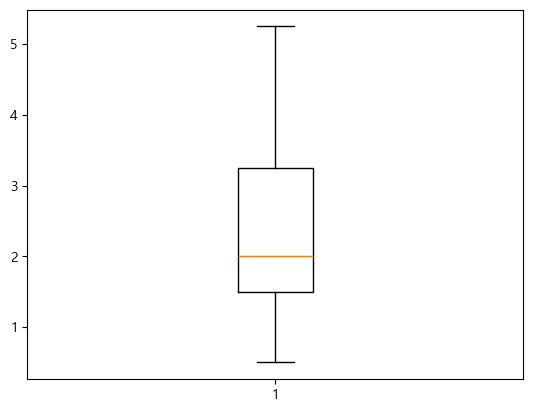

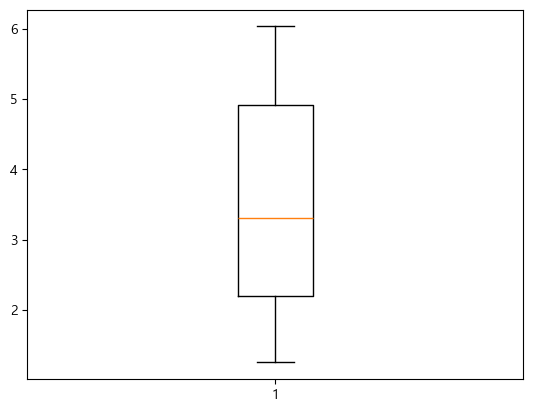

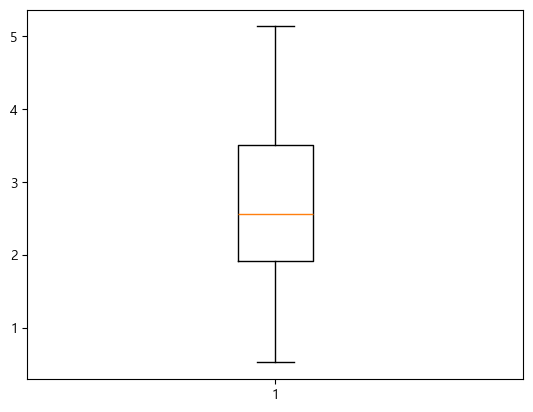

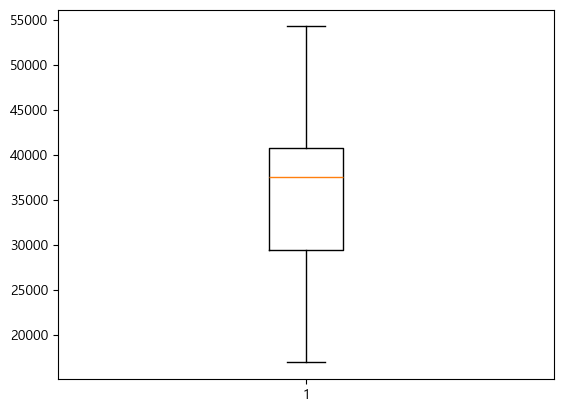

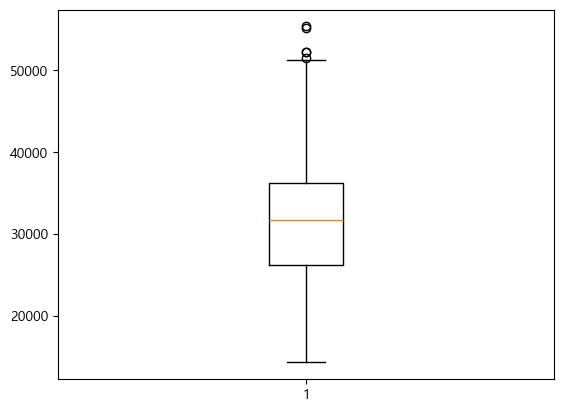

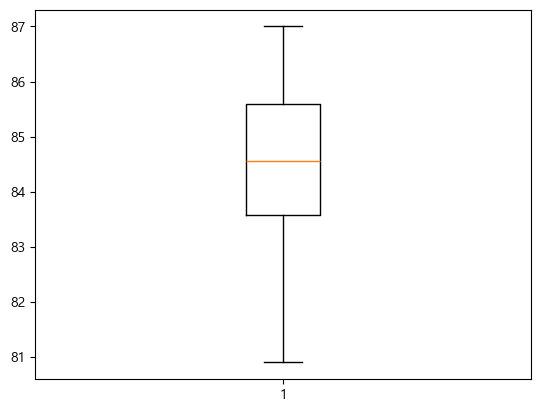

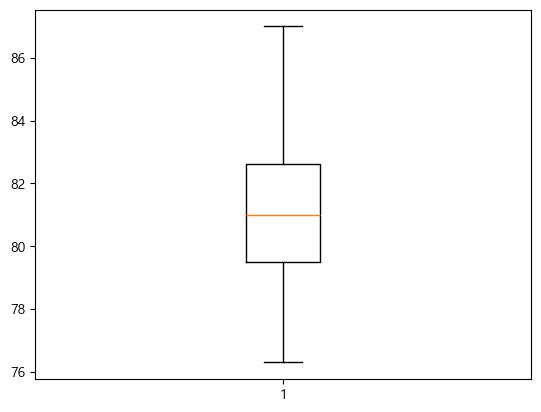

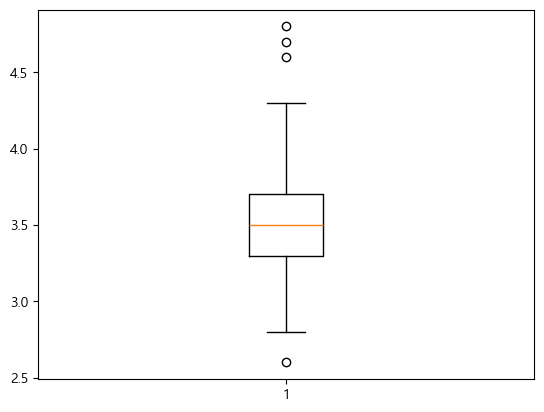

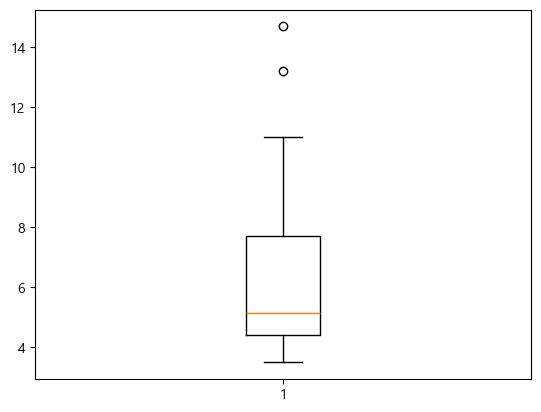

In [117]:
for i in X.columns[1:]:
    plt.boxplot(X[i])
    plt.show()

- 정규성 검정

In [118]:
from scipy import stats
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

경제심리지수(원계열) 216
shapiro p_value: 2.2491317142048217e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.8912980908341024e-12 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 216
shapiro p_value: 3.7692882415285567e-06 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 6.384022458297421e-08 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 216
shapiro p_value: 4.774892303771594e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 6.761933241483324e-08 데이터는 정규 분포를 따르지 않습니다.
M2(말잔, 원계열) 216
shapiro p_value: 8.089221523732704e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.00021054370096083632 데이터는 정규 분포를 따르지 않습니다.
미국M2 216
shapiro p_value: 1.0465287664240819e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 2.6003496988367877e-05 데이터는 정규 분포를 따르지 않습니다.
USBIR 216
shapiro p_value: 2.6186147641458578e-18 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 2.8544506032878915e-09 데이터는 정규 분포를 따르지 않습니다.
KOBIR 216
shapiro p_value: 6.125505080945004e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.0006649955057666638 데이터는 정규 분포를 따르지 않습니다.
KOTN 216
shapiro p_value: 6.060

- VIF 확인

In [119]:
!pip install statsmodels

In [120]:
# VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = sm.add_constant(X)
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Features           VIF
0         const  15019.713012
1   경제심리지수(원계열)      4.117654
2        뉴스심리지수      3.285714
3     원자재구입가격실적      2.828055
4   M2(말잔, 원계열)    113.065646
5          미국M2     80.880875
6         USBIR     12.112223
7         KOBIR     20.269085
8          KOTN     17.672758
9          USTN     13.896219
10     달러결제수출금액     25.249834
11     달러결제수입금액     41.160951
12     달러결제수출비율      3.036113
13     달러결제수입비율      5.085516
14        한국실업률      2.464732
15        미국실업률      3.605824


- 공분산 확인

<Axes: >

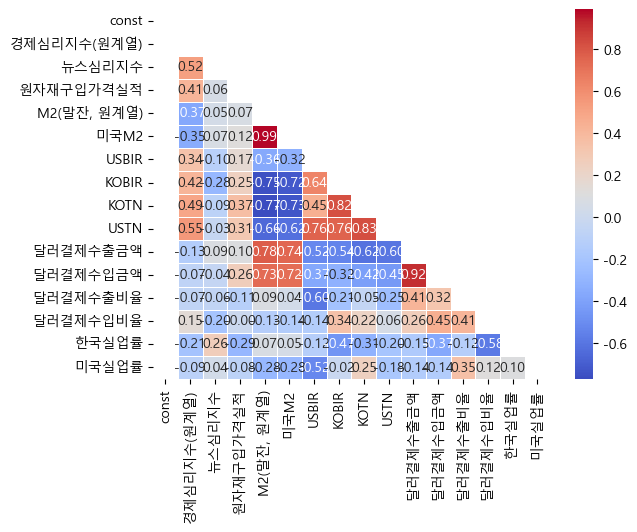

In [121]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

## 데이터 전처리

In [122]:
# 실적과 전망 중 실적이 객관적이므로 전망을 drop
# X.drop(['수출전망', '원자재구입가격전망'], axis=1, inplace=True)

In [123]:
# 수출을 달러로 결제하면 결제대금을 달러로 받고 원화로 바꾸려하니 원/달러 환율에는 음의 영향으로 예상
# 반대로 달러결제 수입은 결제대금을 달러로 지급해야 해서 원화를 달러로 바꾸려 하니 원/달러 환율에는 양의 영향의로 예상
# so 달러결제수입금액 - 달러결제수출금액

- 달러결제수입금액 - 달러결제수출금액

In [124]:
X['달러결제순수입액'] = X['달러결제수입금액'] - X['달러결제수출금액']
X.drop(['달러결제수입금액', '달러결제수출금액'], axis=1, inplace=True)

- KO/US M2 = 한국M2 / 미국M2

In [125]:
# 한국M2를 미국M2로 나눠 환율과 단위 일치
X['KO/US M2'] = X['M2(말잔, 원계열)'] / X['미국M2']
X.drop(['M2(말잔, 원계열)', '미국M2'], axis=1, inplace=True)

- BIRDIFF = 미국기준금리 - 한국기준금리

In [126]:
# 미국금리가 원/달러 환율에 양의 영향이 예상
X['BIRDIFF'] = X['USBIR'] - X['KOBIR']
X.drop(['USBIR', 'KOBIR'], axis=1, inplace=True)

- TNDIFF = 미국 10년물 국채수익률 - 한국 10년물 국채수익률

In [127]:
X['TNDIFF'] = X['USTN'] - X['KOTN']
X.drop(['KOTN', 'USTN'], axis=1, inplace=True)

In [128]:
X.columns

Index(['const', '경제심리지수(원계열)', '뉴스심리지수', '원자재구입가격실적', '달러결제수출비율', '달러결제수입비율',
       '한국실업률', '미국실업률', '달러결제순수입액', 'KO/US M2', 'BIRDIFF', 'TNDIFF'],
      dtype='object')

In [129]:
(X[['경제심리지수(원계열)', '뉴스심리지수']] - 100) / 10
# StandardSacaler된 셈이다

,경제심리지수(원계열),뉴스심리지수
0,-0.47,0.639
1,0.81,1.062
2,1.09,0.398
3,1.04,0.087
4,0.38,0.194
...,...,...
211,-0.07,-0.208
212,-0.20,-1.386
213,-0.46,-1.985
214,-0.88,-1.147


In [130]:
X['원자재구입가격실적'] = (X['원자재구입가격실적'] - 100) / 100
# StandardSacaler는 아니지만 StandardSacaler된 셈이다

In [131]:
X[['달러결제수출비율', '달러결제수입비율']] = X[['달러결제수출비율', '달러결제수입비율']] / 100
# MinmaxScaler된 셈이다

<Axes: >

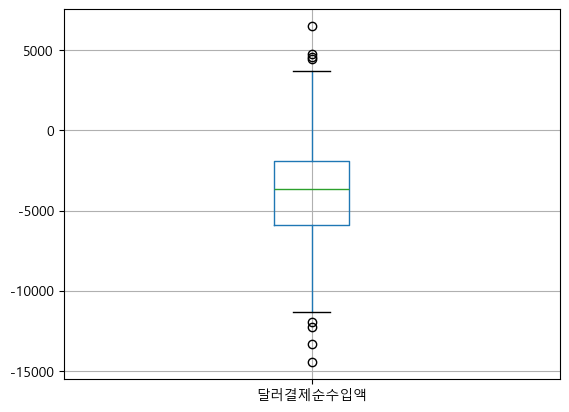

In [132]:
X[['달러결제순수입액']].boxplot()

- Droped 한국외환보유액 / 미국외환보유액

In [133]:
# X['KO/US FER'] = X['한국외환보유액'] / X['미국외환보유액']
# X.drop(['한국외환보유액', '미국외환보유액'], axis=1, inplace=True)

- Droped 한국생산자물가지수 / 미국생산자물가지수

In [134]:
# X['KO/US PPI'] = X['한국생산자물가지수'] / X['미국생산자물가지수']
# X.drop(['한국생산자물가지수', '미국생산자물가지수'], axis=1, inplace=True)

- droped 미국주가지수 Dow jones / 한국주가지수 KOSPI

In [135]:
# X['KO/US SI'] = X['KOSPI'] / X['Dow Jones']
# X.drop(['KOSPI', 'Dow Jones'], axis=1, inplace=True)

- EIRDIFF = 미국실업률 - 한국실업률

In [136]:
X['EIRDIFF'] = X['미국실업률'] - X['한국실업률']
X.drop(['미국실업률', '한국실업률'], axis=1, inplace=True)

## 데이터 재탐색

- 공분산 hitmap

<Axes: >

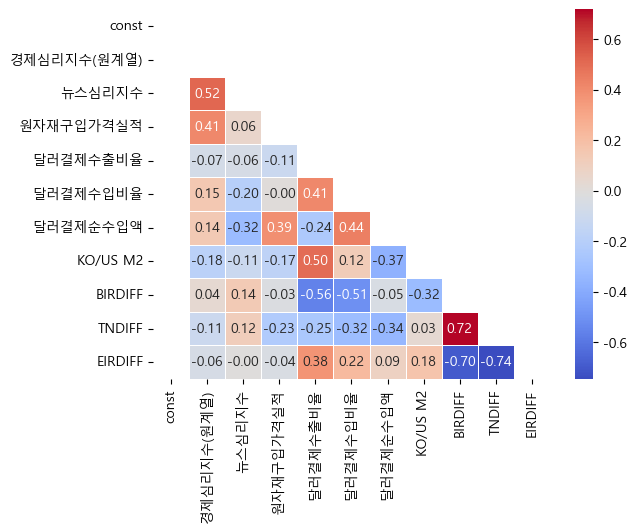

In [137]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

- VIF 확인

In [138]:
import statsmodels.api as sm

In [139]:
# VIF 확인하기 
# X = df.drop(['시점','KRW/USD'], axis=1)
# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
# X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
vif.sort_values('VIF Factor',ascending=False)

,Feature,VIF Factor
0,const,7459.483119
8,BIRDIFF,4.632962
9,TNDIFF,4.333911
6,달러결제순수입액,3.370857
10,EIRDIFF,3.267152
5,달러결제수입비율,3.115345
4,달러결제수출비율,2.206468
1,경제심리지수(원계열),2.094464
2,뉴스심리지수,1.997206
3,원자재구입가격실적,1.734415


In [140]:
# # VIF확인하기
# vif = pd.DataFrame()
# vif["Features"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif)

- 정규성 검증

In [141]:
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

const 216
shapiro p_value: 1.0 데이터는 정규 분포를 따를 가능성이 있습니다.
normaltest p_value: nan 데이터는 정규 분포를 따를 가능성이 있습니다.
경제심리지수(원계열) 216
shapiro p_value: 2.2491317142048217e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.8912980908341024e-12 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 216
shapiro p_value: 3.7692882415285567e-06 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 6.384022458297421e-08 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 216
shapiro p_value: 4.7750305043336994e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 6.761933241483053e-08 데이터는 정규 분포를 따르지 않습니다.
달러결제수출비율 216
shapiro p_value: 0.0015897880075499415 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.00183095897706318 데이터는 정규 분포를 따르지 않습니다.
달러결제수입비율 216
shapiro p_value: 0.14088764786720276 데이터는 정규 분포를 따를 가능성이 있습니다.
normaltest p_value: 0.055183358624503846 데이터는 정규 분포를 따를 가능성이 있습니다.
달러결제순수입액 216
shapiro p_value: 0.09959155321121216 데이터는 정규 분포를 따를 가능성이 있습니다.
normaltest p_value: 0.1598181565919756 데이터는 정규 분포를 따를 가능성이 있습니다.
KO/US M2 216
shapiro p_value: 7.604842267028289e-08 데

- 병합해서 to_csv scaled_data

In [142]:
Mdate

0      200501
1      200502
2      200503
3      200504
4      200505
        ...  
211    202208
212    202209
213    202210
214    202211
215    202212
Name: 시점, Length: 216, dtype: int64

In [143]:
scaled_data = pd.concat([Mdate, X,y], axis=1)

In [144]:
filename = 'scaled_data.csv'
scaled_data.to_csv(current_directory+'/'+filename)